In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [48]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.shape

(891, 12)

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for NULL Values

In [52]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  891


,Total Missing,In Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


# Replacing al the NULL Values

### Firstly, since 77% of the cabin column is NULL, we will drop the column.

In [53]:
df = df.drop(['Cabin'], axis = 1)

### We replace the NULL values in age column with Mean of the column

In [54]:
df['Age'].fillna(value = df['Age'].mean().round(0), inplace=True)

### We will replece the rows where the Embarked Value is NULL

In [55]:
df = df.dropna(subset=['Embarked'])

### Checking if all NULL VAlues are removed

In [56]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  889


,Total Missing,In Percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


# Data Visualization

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
survived_count = df.groupby('Survived')['Survived'].count() # can be done using value counts
survived_count

Survived
0    549
1    340
Name: Survived, dtype: int64

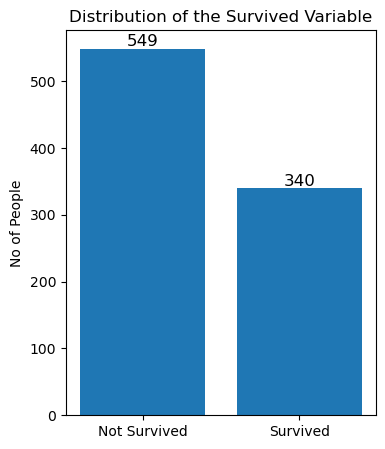

In [59]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Distribution of the Survived Variable')
plt.xticks([0,1],['Not Survived','Survived'])
plt.ylabel('No of People')
for i, value in enumerate(survived_count.values):
    plt.text(i, value+10, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.savefig('Distribution of the Survived Variable.pdf', bbox_inches='tight')
plt.show()

### Sex vs Survived

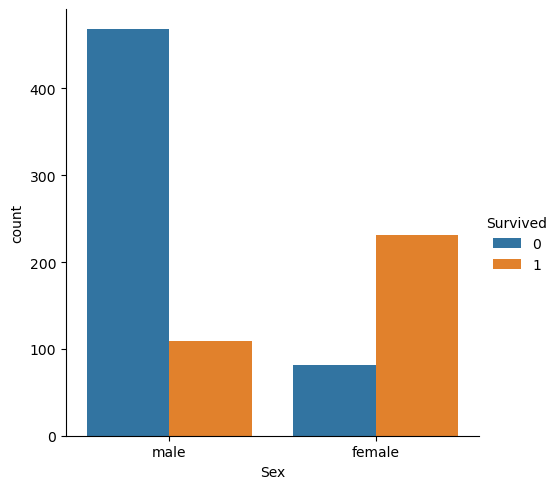

In [60]:
sns.catplot(x="Sex",hue="Survived", kind="count", data=df)

## Age Distribution

In [69]:
ages = df['Age'].values

In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'].astype(float))

In [70]:
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])

In [71]:
ages_hist

(array([ 62, 102, 220, 343,  89,  48,  18,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [72]:
ages_hist_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']

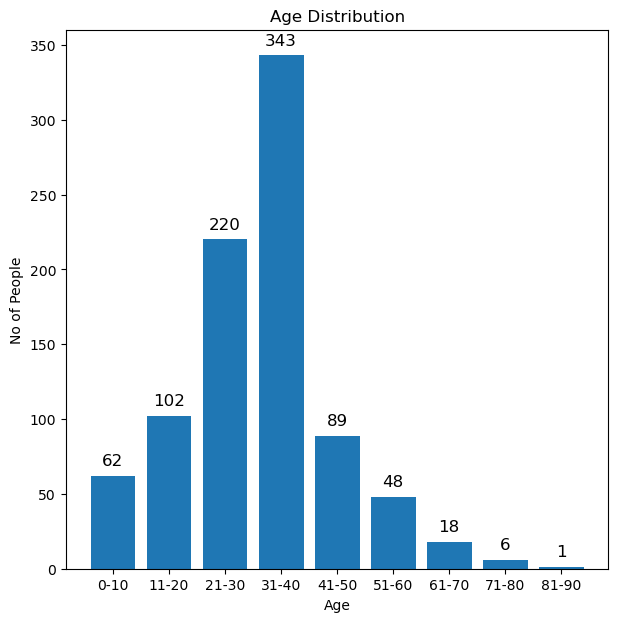

In [73]:
plt.figure(figsize=(7,7))
plt.title('Age Distribution')
plt.bar(ages_hist_labels,ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of People')
for i,value in enumerate(ages_hist[0]):
    plt.text(i, value+10, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()

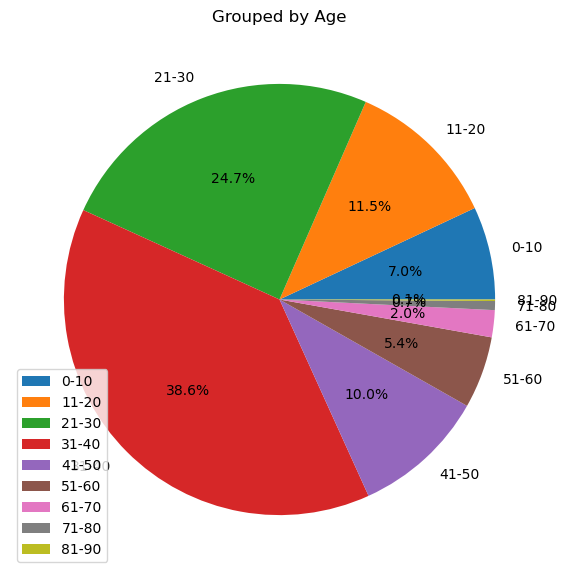

In [77]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Age')
plt.pie(ages_hist[0],labels=ages_hist_labels,autopct="%1.1f%%")
plt.legend()
plt.show()

## Embarked vs PClass Vs Survived

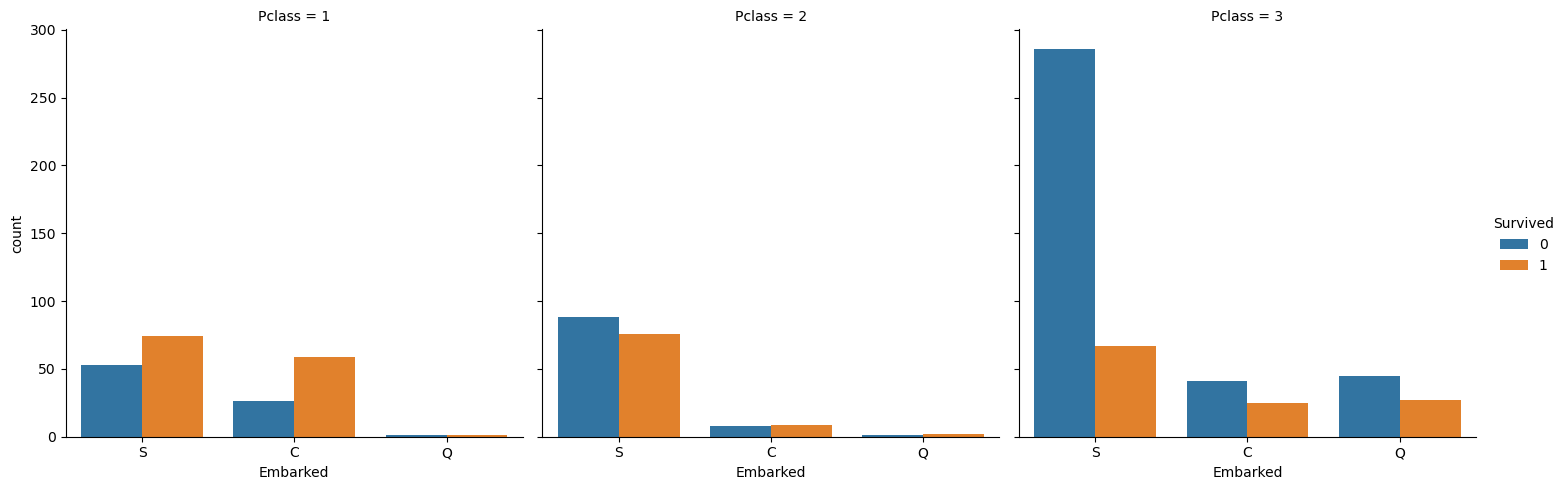

In [79]:
sns.catplot(x="Embarked",hue="Survived",kind="count", col='Pclass', data=df)
